In [10]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

time = 100

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
data_path = 'log.txt'
with open(data_path, 'r') as f:
    lines = f.read().rstrip('\n').split('\n')

Saving log.txt to log.txt
User uploaded file "log.txt" with length 51068 bytes


In [11]:
# compute delays and bandwidths
delays, bandwidths = [[] for _ in range(time)], [[] for _ in range(time)]
for count, line in enumerate(lines):
  line = line.split()
  if count == 0:
    start = int(float(line[3]))
  for i in range(time):
    if start + i <= int(float(line[2])) < start + i + 1:
      delay = float(line[3]) - float(line[2])
      delays[i].append(delay)
      bandwidths[i].append(float(line[4]) * 8)
print(delays)
print(bandwidths)

[[9.083747863769531e-05, 0.0003542900085449219, 0.00021958351135253906, 0.000244140625, 0.00027298927307128906, 0.00026798248291015625], [0.0002589225769042969], [0.0002808570861816406, 5.626678466796875e-05, 0.00018286705017089844], [0.0002579689025878906, 0.00022482872009277344, 0.0002167224884033203, 0.00018453598022460938, 0.00020170211791992188], [0.00026798248291015625, 0.00021195411682128906, 0.00021076202392578125, 0.00023055076599121094], [0.0002923011779785156, 0.00022745132446289062, 0.00029468536376953125], [0.0005066394805908203, 0.0002002716064453125, 0.0001266002655029297, 0.0001742839813232422, 0.00010585784912109375, 0.00023555755615234375, 0.00016427040100097656, 0.00027298927307128906, 0.0002117156982421875], [0.0002586841583251953, 0.000278472900390625, 0.0002620220184326172, 0.00026297569274902344], [0.00025200843811035156, 0.0002377033233642578, 0.00019240379333496094, 0.0001876354217529297, 0.00021505355834960938, 0.0002086162567138672], [0.0002684593200683594, 0

In [12]:
delays_form = pd.DataFrame(data=delays).T
print(delays_form)

          0         1         2         3         4         5         6   \
0   0.000091  0.000259  0.000281  0.000258  0.000268  0.000292  0.000507   
1   0.000354       NaN  0.000056  0.000225  0.000212  0.000227  0.000200   
2   0.000220       NaN  0.000183  0.000217  0.000211  0.000295  0.000127   
3   0.000244       NaN       NaN  0.000185  0.000231       NaN  0.000174   
4   0.000273       NaN       NaN  0.000202       NaN       NaN  0.000106   
5   0.000268       NaN       NaN       NaN       NaN       NaN  0.000236   
6        NaN       NaN       NaN       NaN       NaN       NaN  0.000164   
7        NaN       NaN       NaN       NaN       NaN       NaN  0.000273   
8        NaN       NaN       NaN       NaN       NaN       NaN  0.000212   
9        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
12       NaN

In [13]:
bandwidths_form = pd.DataFrame(data=bandwidths).T
print(bandwidths_form)

       0      1      2      3      4      5      6      7      8      9   ...  \
0   304.0  704.0  712.0  712.0  712.0  712.0  712.0  696.0  704.0  712.0  ...   
1   704.0    NaN  304.0  712.0  712.0  712.0  704.0  704.0  712.0  712.0  ...   
2   712.0    NaN  704.0  712.0  712.0  712.0  712.0  704.0  712.0  712.0  ...   
3   712.0    NaN    NaN  712.0  712.0    NaN  712.0  712.0  712.0    NaN  ...   
4   704.0    NaN    NaN  712.0    NaN    NaN  304.0    NaN  712.0    NaN  ...   
5   712.0    NaN    NaN    NaN    NaN    NaN  712.0    NaN  712.0    NaN  ...   
6     NaN    NaN    NaN    NaN    NaN    NaN  712.0    NaN    NaN    NaN  ...   
7     NaN    NaN    NaN    NaN    NaN    NaN  712.0    NaN    NaN    NaN  ...   
8     NaN    NaN    NaN    NaN    NaN    NaN  712.0    NaN    NaN    NaN  ...   
9     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
10    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
11    NaN    NaN    NaN    N

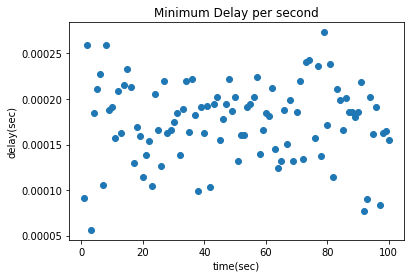

In [14]:
# sketch for min delay
timeRange = range(1, 101)
min_delays = delays_form.min()
plt.scatter(timeRange, min_delays)
plt.title("Minimum Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()


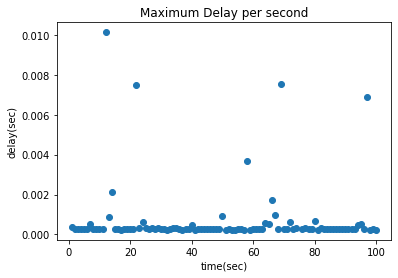

In [15]:
# sketch for max delay
max_delays = delays_form.max()
plt.scatter(timeRange, max_delays)
plt.title("Maximum Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()

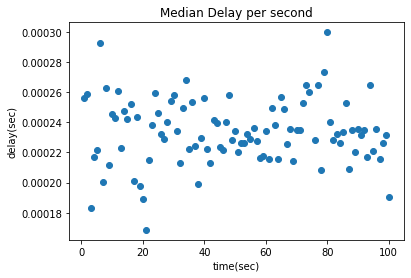

In [16]:
# sketch for median delay
median_delays = delays_form.median()
plt.scatter(timeRange, median_delays)
plt.title("Median Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()

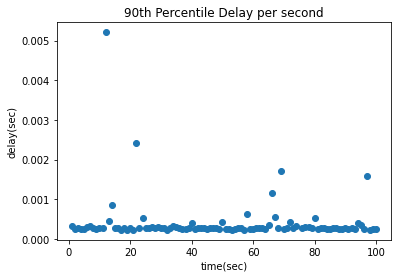

In [17]:
# sketch for 90th percentile delay
percentile_delays = delays_form.quantile(0.9)
plt.scatter(timeRange, percentile_delays)
plt.title("90th Percentile Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()

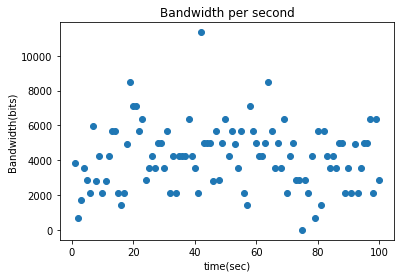

In [19]:
# sketch for bandwidth
bandwidth = bandwidths_form.sum()
plt.scatter(timeRange, bandwidth)
plt.title("Bandwidth per second")
plt.xlabel("time(sec)")
plt.ylabel("Bandwidth(bits)")
plt.show()